In [1]:
# подключаем библиотеку
%run libs/pump_unit.ipynb

In [2]:
# файлы с характеристиками насосов
files = ['data/pump.csv',
         'data/pump.csv',
         'data/pump.csv',
         'data/pump.csv']

In [3]:
# шаг изменения параметров при рассчете
flow_step=10.0
head_step=0.2

In [4]:
# первый подъём
pb_1 = PumpBattery(flow_step, head_step, files)
pb_1.calc_units_matrices()

# второй подъём
pb_2 = PumpBattery(flow_step, head_step, files)
pb_2.calc_units_matrices()

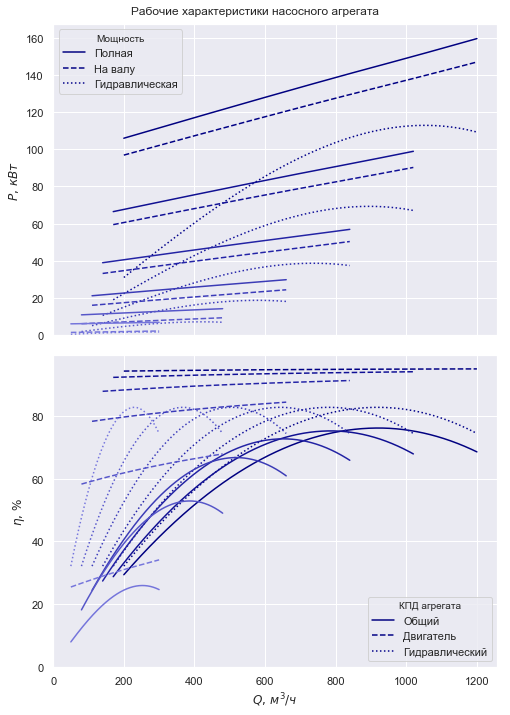

In [5]:
pb_1.units[0].plot_work_curves()

In [6]:
# посчитаем один из вариантов работы
scenario = 0
pb_1.calc_mutation_matrix(scenario)
pb_2.calc_mutation_matrix(scenario)

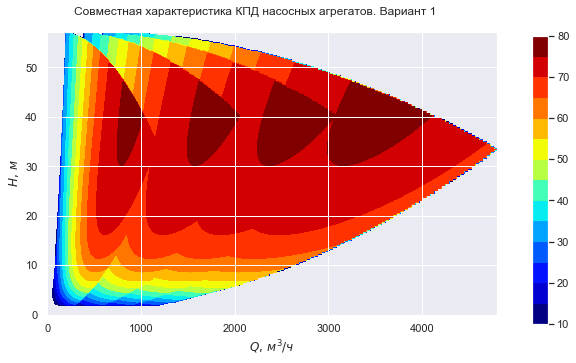

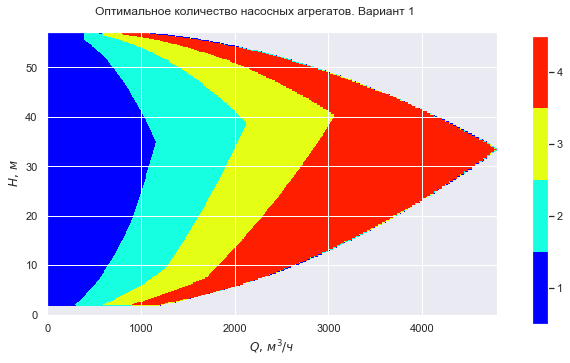

In [7]:
# посмотрим на результат
pb_1.plot_eff_total_map(scenario)
pb_1.plot_count_total_map(scenario)

In [8]:
# работа с данными из файлов

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [10]:
# конвертер величин

def convert_unit(kind, value, unit_in, unit_out):
    unit = {
        'head': {'m':1.0, 'kgf_cm2':10.0, 'bar':10.197, 'kPa':0.10197, 'atm':10.33, 'psi':0.70307},
        'flow': {'cbmh':1.0, 'cbms':3600.0, 'lpm':0.06, 'lps':3.6},
        'power': {'kW':1.0, 'W':0.001}
    }
    return value * unit[kind][unit_in] / unit[kind][unit_out]

In [11]:
# читаем показания

log_1 = pd.read_csv('data/log_06_04_2019.csv', sep=';', decimal=',')
log_1["date"] = pd.to_datetime(log_1["date"], format="%d.%m.%Y %H:%M")
log_1.fillna(method ='ffill', inplace=True)

log_2 = pd.read_csv('data/log_21_04_2019.csv', sep=';', decimal=',')
log_2["date"] = pd.to_datetime(log_2["date"], format="%d.%m.%Y %H:%M")
log_2.fillna(method ='ffill', inplace=True)

In [12]:
# объединяем 2 набора данных для обработки

frames = [log_1, log_2]
log = pd.concat(frames, ignore_index=True)

num = log_1.shape[0]

In [13]:
# преобразуем показания давления

head_cols = ['head in', 'head out', 'head in lift 1', 'head out lift 1', 'head in lift 2', 'head out lift 2']
for col in head_cols:
    log[col] = log[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))

#### Вспомогательные переменные

In [14]:
freq_cols = ['freq unit 1', 'freq unit 2', 'freq unit 3', 'freq unit 3.1', 
             'freq unit 4', 'freq unit 5', 'freq unit 6', 'freq unit 6.1']
freq_cols_1 = freq_cols[:4]
freq_cols_2 = freq_cols[4:]

In [15]:
speed_cols = ['speed unit 1', 'speed unit 2', 'speed unit 3', 'speed unit 3.1',
              'speed unit 4', 'speed unit 5', 'speed unit 6', 'speed unit 6.1']
speed_cols_1 = speed_cols[:4]
speed_cols_2 = speed_cols[4:]

In [16]:
power_sup_cols = ['power sup. unit 1', 'power sup. unit 2', 'power sup. unit 3', 'power sup. unit 3.1',
                  'power sup. unit 4', 'power sup. unit 5', 'power sup. unit 6', 'power sup. unit 6.1']
power_sup_cols_1 = power_sup_cols[:4]
power_sup_cols_2 = power_sup_cols[4:]

In [17]:
power_hydro_cols = ['power hydro unit 1', 'power hydro unit 2', 'power hydro unit 3', 'power hydro unit 3.1',
                    'power hydro unit 4', 'power hydro unit 5', 'power hydro unit 6', 'power hydro unit 6.1']
power_hydro_cols_1 = power_hydro_cols[:4]
power_hydro_cols_2 = power_hydro_cols[4:]

In [18]:
flow_cols = ['flow unit 1', 'flow unit 2', 'flow unit 3', 'flow unit 3.1',
             'flow unit 4', 'flow unit 5', 'flow unit 6', 'flow unit 6.1']
flow_cols_1 = flow_cols[:4]
flow_cols_2 = flow_cols[4:]

In [19]:
power_rate_cols = ['power rate unit 1', 'power rate unit 2', 'power rate unit 3', 'power rate unit 3.1',
                   'power rate unit 4', 'power rate unit 5', 'power rate unit 6', 'power rate unit 6.1']
power_rate_cols_1 = power_rate_cols[:4]
power_rate_cols_2 = power_rate_cols[4:]

In [20]:
eff_actual_cols = ['eff actual unit 1', 'eff actual unit 2', 'eff actual unit 3', 'eff actual unit 3.1',
                   'eff actual unit 4', 'eff actual unit 5', 'eff actual unit 6', 'eff actual unit 6.1']
eff_actual_cols_1 = eff_actual_cols[:4]
eff_actual_cols_2 = eff_actual_cols[4:]

#### Расчеты и графики

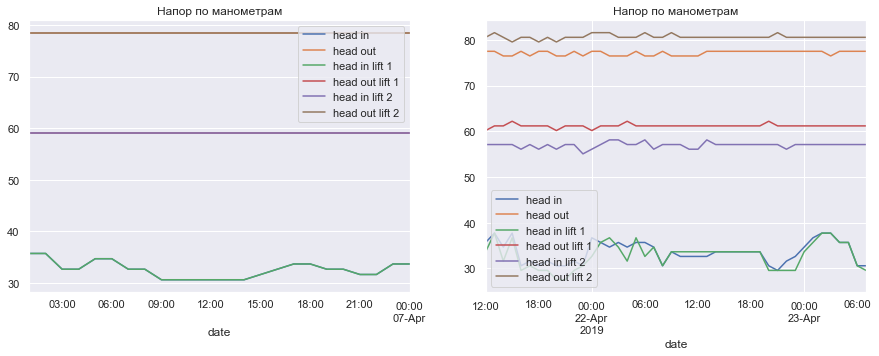

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', head_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[0])
log[num:].plot('date', head_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[1])

In [22]:
# корректировка на высоту установки датчиков

head_in_height = 2.0
head_out_height = 2.0

head_in_N_height = 3.1
head_out_N_height = 3.8

log['head in adj'] = log['head in'] - head_in_height
log['head out adj'] = log['head out'] - head_out_height
log[['head in adj lift 1', 'head in adj lift 2']] = log[['head in lift 1', 'head in lift 2']] - head_in_N_height
log[['head out adj lift 1', 'head out adj lift 2']] = log[['head out lift 1', 'head out lift 2']] - head_out_N_height

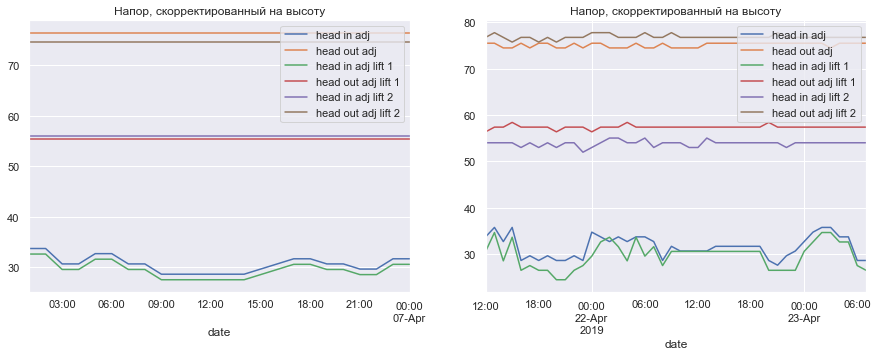

In [23]:
head_adj_cols = ['head in adj', 'head out adj', 
                 'head in adj lift 1', 'head out adj lift 1', 
                 'head in adj lift 2', 'head out adj lift 2']

fig, axes = plt.subplots(nrows=1, ncols=2)
log[:num].plot('date', head_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[0])
log[num:].plot('date', head_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[1])

In [24]:
log['head lift 1'] = log['head out adj lift 1'] - log['head in adj lift 1']
log['head lift 2'] = log['head out adj lift 2'] - log['head in adj lift 2']

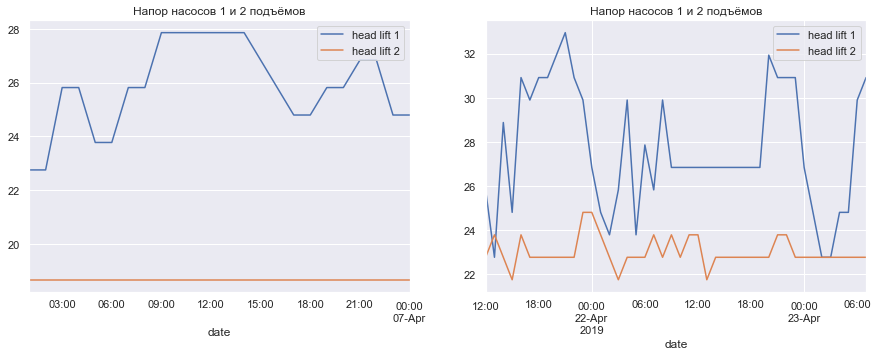

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', ['head lift 1', 'head lift 2'], figsize=(15, 5), title='Напор насосов 1 и 2 подъёмов', ax=axes[0])
log[num:].plot('date', ['head lift 1', 'head lift 2'], figsize=(15, 5), title='Напор насосов 1 и 2 подъёмов', ax=axes[1])

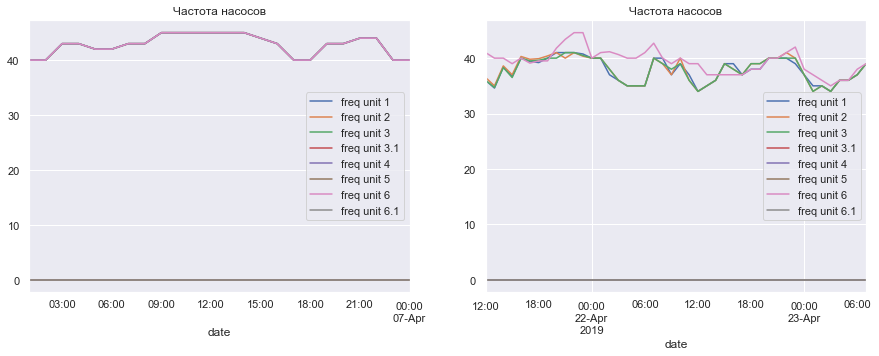

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', freq_cols, figsize=(15, 5), title='Частота насосов', ax=axes[0])
log[num:].plot('date', freq_cols, figsize=(15, 5), title='Частота насосов', ax=axes[1])

In [27]:
# считаем относительную скорость, нормируем на максимальную частоту

log['speed unit 1'], log['speed unit 2'], log['speed unit 3'], log['speed unit 3.1'] = 0, 0, 0, 0
log['speed unit 4'], log['speed unit 5'], log['speed unit 6'], log['speed unit 6.1'] = 0, 0, 0, 0

for col_1, col_2 in zip(freq_cols, speed_cols):
    log[col_2] = log[col_1] / 50.0

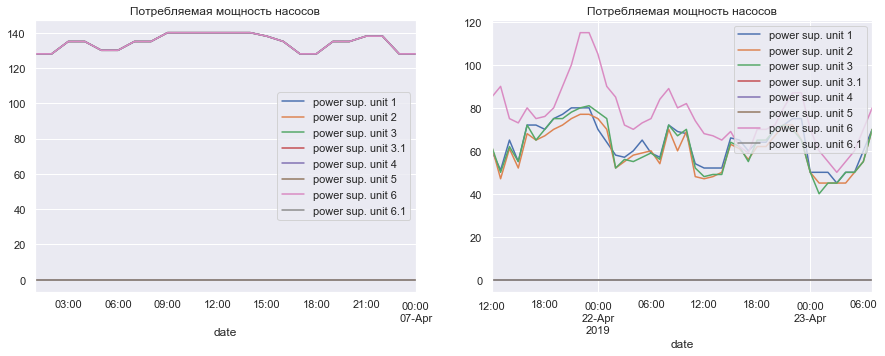

In [28]:
# мощность

fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', power_sup_cols, figsize=(15, 5), title='Потребляемая мощность насосов', ax=axes[0])
log[num:].plot('date', power_sup_cols, figsize=(15, 5), title='Потребляемая мощность насосов', ax=axes[1])

In [29]:
# суммарная мощность насосов

log['power sup. lift 1'] = log[power_sup_cols_1].sum(axis=1)
log['power sup. lift 2'] = log[power_sup_cols_2].sum(axis=1)

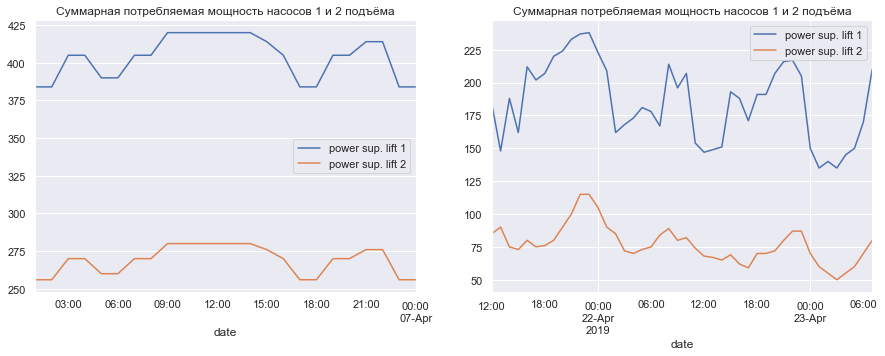

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', ['power sup. lift 1', 'power sup. lift 2'], figsize=(15, 5), 
               title='Суммарная потребляемая мощность насосов 1 и 2 подъёма', ax=axes[0])
log[num:].plot('date', ['power sup. lift 1', 'power sup. lift 2'], figsize=(15, 5), 
               title='Суммарная потребляемая мощность насосов 1 и 2 подъёма', ax=axes[1])

In [31]:
# косвенный поиск расхода каждого насоса через напор и частоту

def get_flow_by_head_speed(unit, head, speed):
    unit.pump.set_speed(speed)
    head_lim = head.copy()
    head_lim[head_lim > unit.pump.head_max] = unit.pump.head_max
    data = quadratic_equation_root(unit.pump.head_c[2], 
                                   unit.pump.head_c[1]*speed, 
                                   head_lim - (unit.pump.head_c[0] * speed**2))
    return pd.Series(data, index=head.index)

In [32]:
# косвенный поиск расхода каждого насоса через напор и частоту

log['flow unit 1'], log['flow unit 2'], log['flow unit 3'], log['flow unit 3.1'] = 0, 0, 0, 0
log['flow unit 4'], log['flow unit 5'], log['flow unit 6'], log['flow unit 6.1'] = 0, 0, 0, 0

for idx, (flow, speed) in enumerate(zip(flow_cols_1, speed_cols_1)):
    log[flow] = get_flow_by_head_speed(pb_1.units[idx], log['head lift 1'], log[speed])

for idx, (flow, speed) in enumerate(zip(flow_cols_2, speed_cols_2)):
    log[flow] = get_flow_by_head_speed(pb_2.units[idx], log['head lift 2'], log[speed])

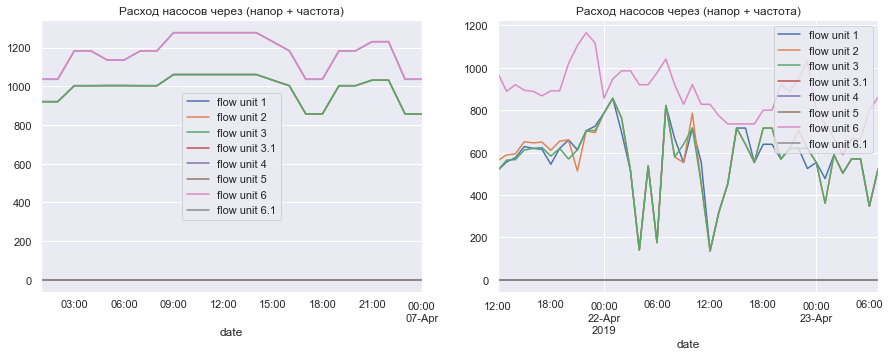

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', flow_cols, figsize=(15, 5), title='Расход насосов через (напор + частота)', ax=axes[0])
log[num:].plot('date', flow_cols, figsize=(15, 5), title='Расход насосов через (напор + частота)', ax=axes[1])

In [34]:
# суммарный расход насосов

log['flow lift 1'] = log[flow_cols_1].sum(axis=1)
log['flow lift 2'] = log[flow_cols_2].sum(axis=1)

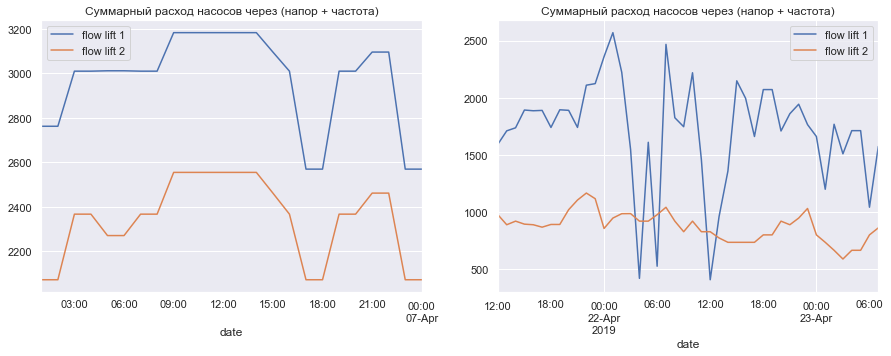

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', ['flow lift 1', 'flow lift 2'], figsize=(15, 5),
               title='Суммарный расход насосов через (напор + частота)', ax=axes[0])
log[num:].plot('date', ['flow lift 1', 'flow lift 2'], figsize=(15, 5), 
               title='Суммарный расход насосов через (напор + частота)', ax=axes[1])

In [36]:
log['power hydro unit 1'], log['power hydro unit 2'], log['power hydro unit 3'], log['power hydro unit 3.1'] = 0, 0, 0, 0
log['power hydro unit 4'], log['power hydro unit 5'], log['power hydro unit 6'], log['power hydro unit 6.1'] = 0, 0, 0, 0

In [37]:
# расчёт гидравлической мощности

log[power_hydro_cols] = 998.0 * 9.81 * log[flow_cols] / 3600.0 / 1000.0
log[power_hydro_cols_1] = log[power_hydro_cols_1].mul(log['head lift 1'], axis=0)
log[power_hydro_cols_2] = log[power_hydro_cols_2].mul(log['head lift 2'], axis=0)

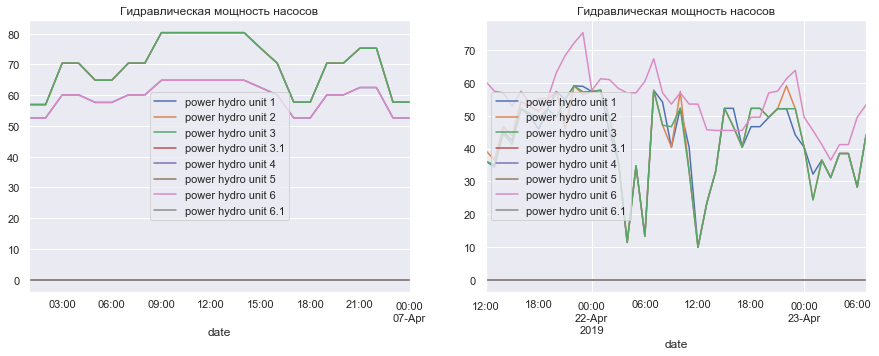

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', power_hydro_cols, figsize=(15, 5), title='Гидравлическая мощность насосов', ax=axes[0])
log[num:].plot('date', power_hydro_cols, figsize=(15, 5), title='Гидравлическая мощность насосов', ax=axes[1])

In [39]:
# суммарная гидравлическая мощность насосов

log['power hydro lift 1'] = log[power_hydro_cols_1].sum(axis=1)
log['power hydro lift 2'] = log[power_hydro_cols_2].sum(axis=1)

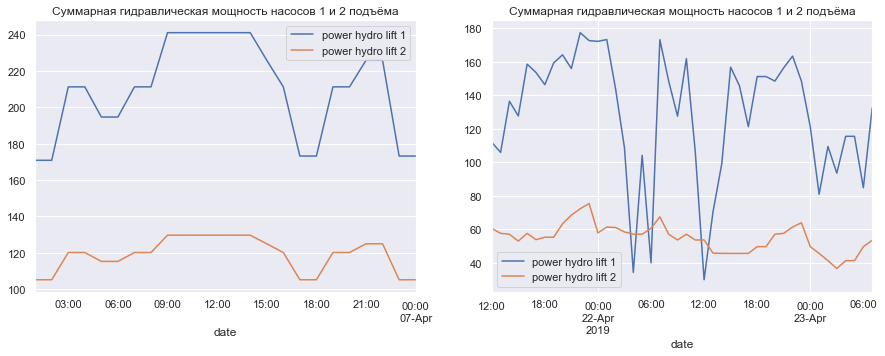

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', ['power hydro lift 1', 'power hydro lift 2'], figsize=(15, 5), 
               title='Суммарная гидравлическая мощность насосов 1 и 2 подъёма', ax=axes[0])
log[num:].plot('date', ['power hydro lift 1', 'power hydro lift 2'], figsize=(15, 5), 
               title='Суммарная гидравлическая мощность насосов 1 и 2 подъёма', ax=axes[1])

In [41]:
# расчёт удельного расхода электроэнергии

log['power rate lift 1'] = log['power sup. lift 1'] / log['flow lift 1']
log['power rate lift 2'] = log['power sup. lift 2'] / log['flow lift 2']

In [42]:
# расчёт КПД

log['eff actual lift 1'] = log['power hydro lift 1'] / log['power sup. lift 1'] * 100.0
log['eff actual lift 2'] = log['power hydro lift 2'] / log['power sup. lift 2'] * 100.0

In [43]:
# поиск индекса элемента в массиве по значению

def find_index(array, value):
    return (np.abs(np.asarray(array) - value)).argmin()

# поиск ближайшего значения из массива

def find_quant(array, value):
    return array[find_index(array, value)]

In [44]:
# квантование напора по уровням с заданным шагом

log['head idx lift 1'] = log['head lift 1'].apply(lambda x: find_index(pb_1.head_points, x))
log['head idx lift 2'] = log['head lift 2'].apply(lambda x: find_index(pb_2.head_points, x))

log['head quant lift 1'] = pb_1.head_points[log['head idx lift 1']]
log['head quant lift 2'] = pb_2.head_points[log['head idx lift 2']]

In [45]:
# квантование расхода по уровням с заданным шагом

log['flow idx lift 1'] = log['flow lift 1'].apply(lambda x: find_index(pb_1.flow_points, x))
log['flow idx lift 2'] = log['flow lift 2'].apply(lambda x: find_index(pb_2.flow_points, x))

log['flow quant lift 1'] = pb_1.flow_points[log['flow idx lift 1']]
log['flow quant lift 2'] = pb_2.flow_points[log['flow idx lift 2']]

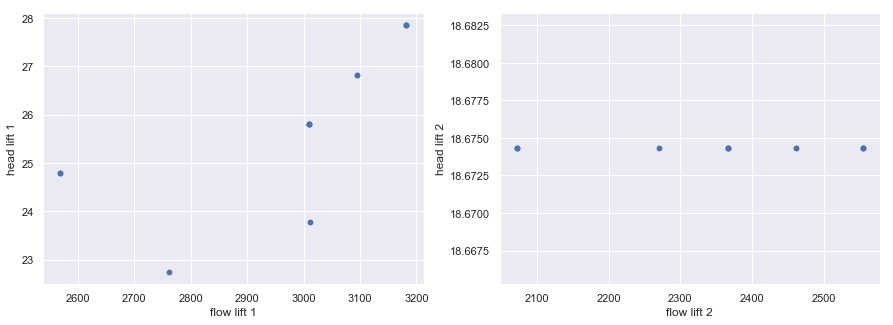

In [201]:
# фактические рабочие точки станции

fig, axes = plt.subplots(nrows=1, ncols=2)
log[:num].plot.scatter('flow lift 1', 'head lift 1', figsize=(15, 5), color='b', ax=axes[0])
log[:num].plot.scatter('flow lift 2', 'head lift 2', figsize=(15, 5), color='b', ax=axes[1])
#ax = df.plot.scatter(x='flow', y='head', color='b', label='Измеренные', figsize=(15,10))
#df.plot.scatter(x='flow_quant', y='head_quant', color='r', label='После квантования', ax=ax)
#plt.xlabel('$Q,\, м^3/ч$')
#plt.ylabel('$H,\, м$')
#plt.title('Фактические рабочие точки станции')
#plt.axis([0, None, 0, None])
#plt.show()

In [29]:
# квантование напора и расхода по уровням с заданным шагом



In [30]:
#log_1['N_hydro1'] = 998.0 * 9.81 * log_1['P_lift1'] * log_1['Q'] / 3600.0 / 1000.0
#pb.hist_power_rate = (pb.hist_power_supply / pb.hist_flow).replace([np.inf, -np.inf], np.nan).fillna(0)
#pb.hist_eff_total = pb.hist_power_hydro / pb.hist_power_supply * 100.0

In [31]:
#log_1.plot('date', 'N_hydro1')

In [ ]:
lift_cols_1 = ['Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1', 'N_2', 'f_2', 'U_2', 'I_2',
               'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1', 'f_3.1', 'U_3.1', 'I_3.1']
lift_cols_2 = ['Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4', 'N_5', 'f_5', 'U_5', 'I_5',
               'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1', 'f_6.1', 'U_6.1', 'I_6.1']
comm_cols = ['Q', 'Pout', 'Pin']

In [2]:
import pandas as pd

In [15]:
log = pd.read_csv('data/pumps_06_04_2019.csv', sep=';', decimal=',')
log.fillna(0, inplace=True)
log["date"] = pd.to_datetime(log["date"], format="%d.%m.%Y %H:%M")

In [20]:
log.head()

,date,Q,Pout,Pin,Pin1,Pout1,N_1,f_1,U_1,I_1,...,U_5,I_5,N_6,f_6,U_6,I_6,N_6.1,f_6.1,U_6.1,I_6.1
0,2019-04-06 01:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
1,2019-04-06 02:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
2,2019-04-06 03:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
3,2019-04-06 04:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
4,2019-04-06 05:00:00,1500,7.7,3.4,3.4,5.8,130,42,380,250,...,0,0,130,42,380,250,0,0,0,0


In [18]:
log.columns

Index(['date', 'Q', 'Pout', 'Pin', 'Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1',
       'N_2', 'f_2', 'U_2', 'I_2', 'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1',
       'f_3.1', 'U_3.1', 'I_3.1', 'Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4',
       'N_5', 'f_5', 'U_5', 'I_5', 'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1',
       'f_6.1', 'U_6.1', 'I_6.1'],
      dtype='object')